In [ ]:
%pip install tensorflow
%pip install tensorflow_datasets
%pip install matplotlib

In [1]:
import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

c:\Users\Theon\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
RPS_data = tfds.load('rock_paper_scissors', split='train')

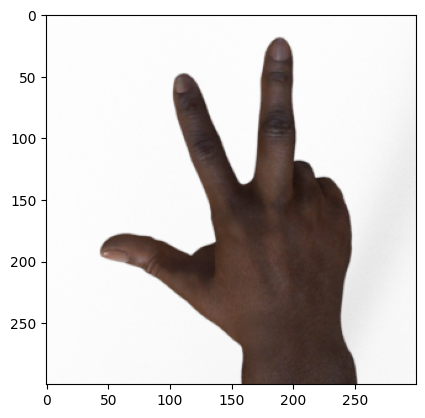

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


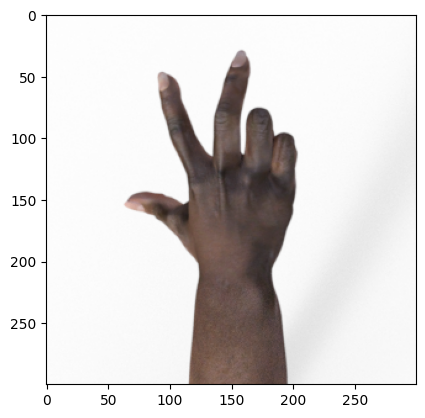

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


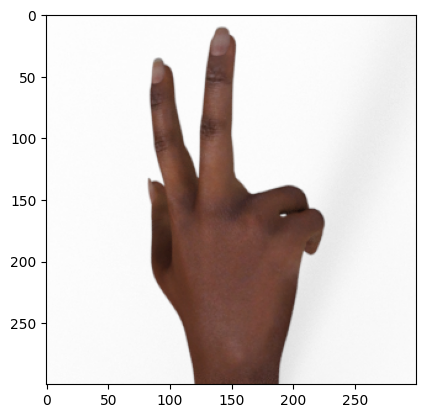

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


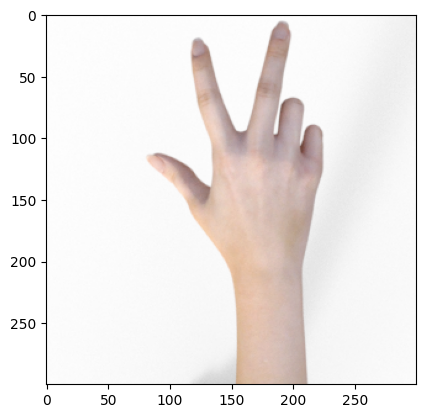

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


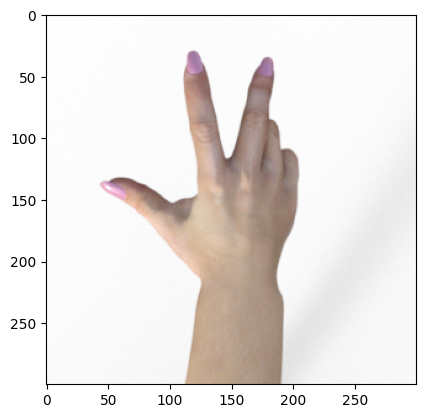

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


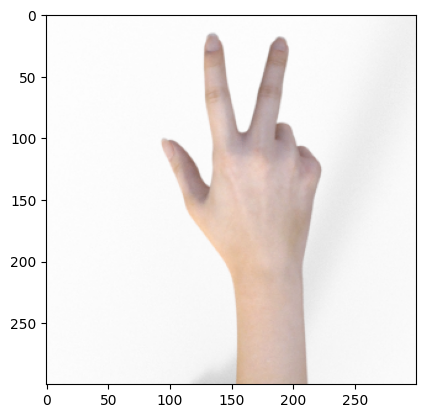

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


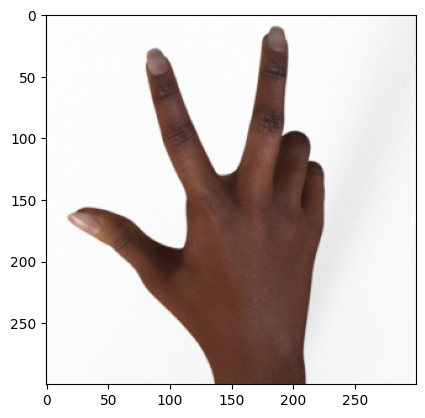

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


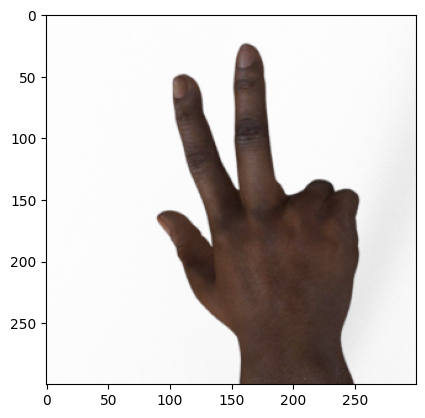

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


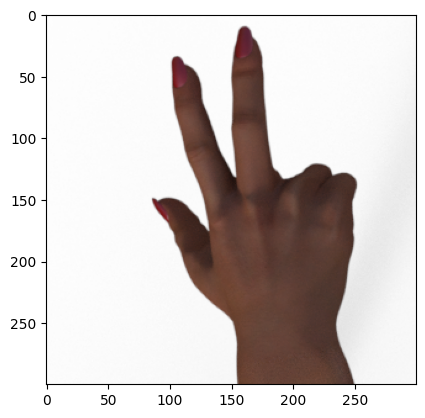

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


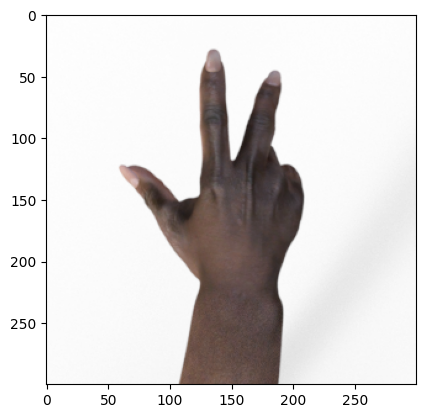

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


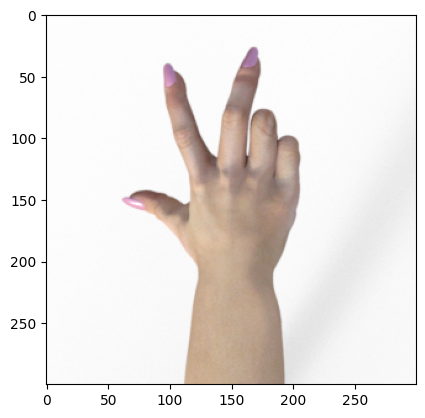

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


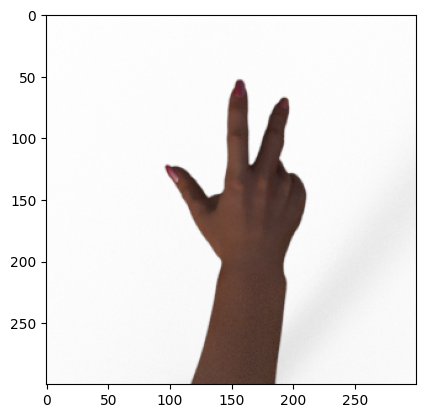

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


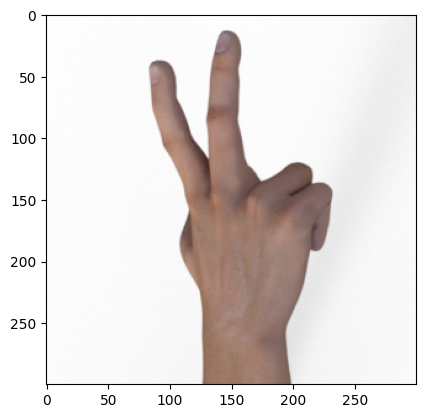

Label: 2
#Examples: 2520
Shape Data: [300 300   3]
Shape Data: []


KeyboardInterrupt: 

In [11]:
#Show image
for ex in RPS_data:
    if ex["label"] == 2:
        example = np.array(ex["image"])
        answer = np.array(ex["label"])


        plt.imshow(example)
        plt.show()
        print(f"Label: {answer}")

        print(f"#Examples: {len(RPS_data)}")
        print(f"Shape Data: {tf.shape(example)}")
        print(f"Shape Data: {tf.shape(answer)}")

        #break

In [ ]:
# 0: Rock
# 1: Paper
# 2: Scissors

In [34]:
x_ = []
y_ = []

for ex in RPS_data:
    x_.append(ex["image"])
    y_.append(ex["label"])

In [52]:
permutation = np.random.permutation(len(RPS_data))

In [53]:
x, y, xt, yt = np.array(x_)[permutation][:2200], np.array(y_)[permutation][:2200], np.array(x_)[permutation][2200:], np.array(y_)[permutation][2200:]


In [ ]:
np.unique(y, return_counts=True), np.unique(yt, return_counts=True)

In [55]:
y = tf.keras.utils.to_categorical(y)
yt = tf.keras.utils.to_categorical(yt)

In [ ]:
y[0], yt[0]

In [ ]:
x[0].shape

In [59]:
model = tf.keras.models.Sequential()

model.add(tf.keras.Input(shape=(300,300,3,1)))
model.add(tf.keras.layers.Conv3D(10, kernel_size=(5,5,3), padding="same"))
model.add(tf.keras.layers.AvgPool3D((5,5,1)))
model.add(tf.keras.layers.Conv3D(10, kernel_size=(5,5,3), padding="same"))
model.add(tf.keras.layers.AvgPool3D((5,5,1)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(200, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation="softmax"))

model.compile(metrics=["acc"], loss=tf.keras.losses.CategoricalCrossentropy(), optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))

In [ ]:
model.summary()

In [ ]:
model.count_params()

In [ ]:
x.shape

In [ ]:
model.fit(x,y,epochs=3, verbose=1)

In [ ]:
model.evaluate(xt,yt, verbose=1)

In [19]:
model.save("model.keras")